# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

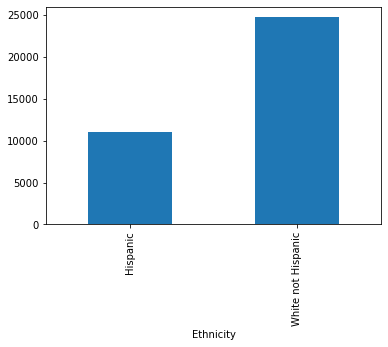

In [1]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plts
df = pd.read_csv("ca_dds_expenditures.csv")
df.head()
temp = df
temp = temp[temp.Ethnicity != "Asian"]
temp = temp[temp.Ethnicity != "Black"]
temp = temp[temp.Ethnicity != "Multi Race"]
temp = temp[temp.Ethnicity != "Native Hawaiian"]
temp = temp[temp.Ethnicity != "Other"]
temp = temp[temp.Ethnicity != "American Indian"]
temp.head(20)
avg_expenditures_ethnicity=temp.groupby("Ethnicity")["Expenditures"].mean()
avg_expenditures_ethnicity.head(1)

#row = avg_expenditures_ethnicity.iloc[3]
#print(row)
plot_exp = avg_expenditures_ethnicity.plot.bar();


**MY EXPLANATION**

According to the overall average, White not Hispanics have an average expenditure that is almost twice the average expenditures of hispanics.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

Text(0.5, 1.0, 'Average Expenditures by Ethnicity and Age Cohort')

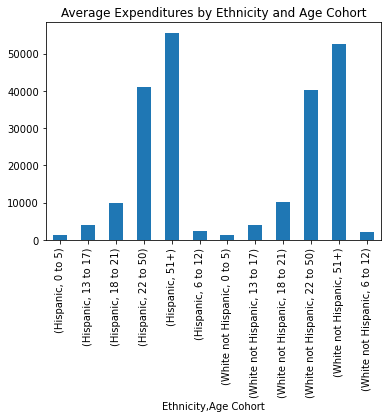

In [2]:
import matplotlib.pyplot as plt
import numpy as np
temp
grouped = temp.groupby(["Ethnicity",'Age Cohort'])["Expenditures"].mean()
grouped
colours = {"Hispanic": "#273c75", "White not Hispanic": "#44bd32"}
#pivot_table()
plot_exp1 = grouped.plot.bar();
plt.title("Average Expenditures by Ethnicity and Age Cohort")



**MY EXPLANATION**


Contrary to the graph above it appears that Hispanics and Nonhispanics have the same amount of expenditures overall.
First, sort Data based on Ethnicity and then age. Second, graph data and compare.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

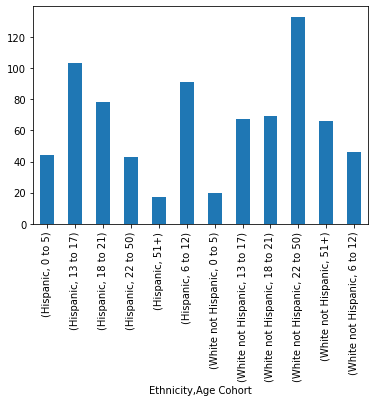

In [3]:
#ages
grouped1 = temp.groupby(["Ethnicity",'Age Cohort'])["Expenditures"].count()
#print("Age Cohort: 0 to 5\n", temp[temp["Age Cohort"] == "0 to 5"].count())
#print("Age Cohort: 13 to 17\n", temp[temp["Age Cohort"] == "13 to 17"].count())
#print("Age Cohort: 18 to 21\n", temp[temp["Age Cohort"] == "18 to 21"].count())
#print("Age Cohort: 22 to 50\n", temp[temp["Age Cohort"] == "22 to 50"].count())
#print("Age Cohort: 6 to 12\n", temp[temp["Age Cohort"] == "6 to 12"].count())
#print("Age Cohort: 51+\n", temp[temp["Age Cohort"] == "51+"].count())
plot_exp2 = grouped1.plot.bar()


The number of people in and age category is not an indicator of the expenditures of that group. For instance, There are less than 20 Hispanics, 51+ however, they have the highest amount of average expenditures.

In [4]:
# YOUR CODE HERE (although you may want to add more code cells)
#DIFFERENCE
difference_from_avg = grouped - avg_expenditures_ethnicity.head(1)
difference_from_avg = grouped - avg_expenditures_ethnicity.head(2)
#difference_from_avg = difference_from_avg ** 2
#difference_from_avg.sum()
difference_from_avg

Ethnicity           Age Cohort
Hispanic            0 to 5        -9672.364603
                    13 to 17      -7110.287596
                    18 to 21      -1105.722995
                    22 to 50      29858.547130
                    51+           44519.430851
                    6 to 12       -8753.382336
White not Hispanic  0 to 5       -23330.648628
                    13 to 17     -20793.190419
                    18 to 21     -14564.490657
                    22 to 50      15490.075432
                    51+           27972.875614
                    6 to 12      -22645.287759
Name: Expenditures, dtype: float64

In [5]:
#HIGHEST AND LOWEST
print(grouped.idxmax())
print(grouped.idxmin())
#grouped.max()

('Hispanic', '51+')
('White not Hispanic', '0 to 5')


**MY EXPLANATION**

So through my analysis I have determined that between the age cohorts : 0-5, 6-12, 13-17, and 18-21 the average expenditures are approximately the same (very little difference). When it comes to age group 51+ HIspanics have a much greater expenditure avareage. HOwever, this data is in conflict when compared to the overall expenditure average of each ethnicty. White not Hispanics tend to hav a lot more expenditures.


## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope.
4. Demo your lab.